In [2]:
# Test if i am using my GPU
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

## Import dependecies

In [3]:
# Import packages
from keras.layers import Flatten, Activation, Dropout
from keras.layers import Dense, Conv2D, MaxPooling2D  
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize, to_categorical 
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from PIL import Image
import seaborn as sns
import numpy as np
import cv2
import os

## Load the dataset

In [4]:
img_path = 'data/'
no_tumor = os.listdir(img_path+ 'no/')
# no_tumor
tumor = os.listdir(img_path+ 'yes/')
# tumor

In [5]:
# Two Empty list of dataset & label, to create 
# independent and dependent variables
# to label no brain tumor as (0) & brain tumor as (1)
dataset = []
label = []

In [6]:
# What is the extension of our images
# pick one image
p = 'no1005.jpg'
# p.split('.')[1]

## Preprocessing of images

In [7]:
for i, img_name in enumerate(no_tumor):
    # check if our image has jpg extension
    if(img_name.split('.')[1] == 'jpg'):
        # read our no tumor image
        image = cv2.imread(img_path + 'no/' + img_name)
        
        # convert it to rgb using PIL package
        # opencv read the images is bgr format
        # thus, our image is converted to array
        image = Image.fromarray(image, "RGB")
        
        # Resize the image to 64 by 64
        image = image.resize((64, 64))
        
        # add our image as array in the dataset lst
        dataset.append(np.array(image))
        # label it as 0 = no brain tumor
        label.append(0)

In [8]:
for i, img_name in enumerate(tumor):
    # check if our image has jpg extension
    if(img_name.split('.')[1] == 'jpg'):
        # read our no tumor image
        image = cv2.imread(img_path + 'yes/' + img_name)
        
        # convert it to rgb using PIL package
        # opencv read the images is bgr format
        # thus, our image is converted to array
        image = Image.fromarray(image, "RGB")
        
        # Resize the image to 64 by 64
        image = image.resize((64, 64))
        
        # add our image as array in the dataset lst
        dataset.append(np.array(image))
        # label it as 1= brain tumor
        label.append(1)

In [9]:
print(len(dataset))
print(len(label))
type(dataset)

3000
3000


list

In [10]:
# convert our images values appended in lists to numpy array 
dataset = np.array(dataset)
label = np.array(label)

## Splitting the Dataset to Train and Test sets

In [11]:
# (20% data) of testing & (80% data) of training
x_train, x_test, y_train, y_test = train_test_split(dataset, label, 
                                                    test_size= 0.2, 
                                                    random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 64, 64, 3)
(600, 64, 64, 3)
(2400,)
(600,)


##### For example in training set images (x train)
#### We have: 
#### 2400 samples of images,
##### with size (height x width) of 64x64 
##### and rgb channel (3) colored images
##### and each one has a label, 0 or 1 (y train)

### Normalization of values of pixels array to small values between 0 an 1

In [12]:
# Reshape = (n, image_width, image_height, n_channel)
# Normalization of the values of our arrays
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)


# convert our label to categorical data for categorical classification
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

## Build the Model

In [32]:
# Define some parameters
INPUT_SIZE = 64

In [33]:
# Select the sequentiel Model
model = Sequential()

# Layer1: add convolution layer, relu activation & maxpooling
model.add(Conv2D(filters= 32, 
                 kernel_size= (3,3),
                 input_shape= (INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

# Layer2: add convolution layer, relu activation & maxpooling
model.add(Conv2D(filters=32, 
                 kernel_size=(3,3),
                 kernel_initializer= 'he_uniform'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

# Layer3: add convolution layer, relu activation & maxpooling
model.add(Conv2D(filters=32, 
                 kernel_size=(3,3),
                 kernel_initializer= 'he_uniform'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

# Flatten: make all images in one column vetcor
model.add(Flatten())

# add 2 dense layers
model.add(Dense(64))
model.add(Activation("relu"))
# off 50% of neurones
model.add(Dropout(0.5)) 

# Output (categorical classification)
model.add(Dense(2))
model.add(Activation("softmax"))

#### Compile the Model

In [35]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#### Fit the Model

In [36]:
adm_hist = model.fit(x_train, y_train,
                   batch_size= 16,
                   verbose= 1,
                   epochs= 25,
                   validation_data= (x_test, y_test),
                   shuffle= False)

Epoch 1/25
150/150 [==============================] - 5s 25ms/step - loss: 0.5513 - accuracy: 0.7362 - val_loss: 0.4524 - val_accuracy: 0.7833
Epoch 2/25
150/150 [==============================] - 3s 19ms/step - loss: 0.4115 - accuracy: 0.8250 - val_loss: 0.4139 - val_accuracy: 0.8000
Epoch 3/25
150/150 [==============================] - 4s 27ms/step - loss: 0.3210 - accuracy: 0.8667 - val_loss: 0.2872 - val_accuracy: 0.8867
Epoch 4/25
150/150 [==============================] - 4s 29ms/step - loss: 0.2460 - accuracy: 0.9008 - val_loss: 0.2241 - val_accuracy: 0.9083
Epoch 5/25
150/150 [==============================] - 3s 23ms/step - loss: 0.1724 - accuracy: 0.9362 - val_loss: 0.1566 - val_accuracy: 0.9450
Epoch 6/25
150/150 [==============================] - 4s 24ms/step - loss: 0.1270 - accuracy: 0.9579 - val_loss: 0.1362 - val_accuracy: 0.9533
Epoch 7/25
150/150 [==============================] - 3s 17ms/step - loss: 0.1014 - accuracy: 0.9683 - val_loss: 0.1042 - val_accuracy: 0.9550

#### Save the Model

In [37]:
model.save('BrainTumor_Adam_10.h5')

#### Evaluate the Model

In [38]:
# Calculate the evaluation of the model of testing, training data
score_test = model.evaluate(x_test, y_test, verbose=0)
score_train = model.evaluate(x_train, y_train, verbose=0)

# Get the Loss & the Accuracy of testing
aTest = score_test[0]
bTest = score_test[1]*100
# Get the Loss & the Accuracy of training
aTrain = score_train[0]
bTrain = score_train[1]*100

print("-"*25)
print(f'Test loss = {aTest:.2f}')
print(f'Test accuracy = {bTest:.2f} %')

print("-"*25)
print(f'Train loss = {aTrain:.2f}')
print(f'Train accuracy = {bTrain:.2f} %')
print("-"*25)

-------------------------
Test loss = 0.12
Test accuracy = 97.83 %
-------------------------
Train loss = 0.00
Train accuracy = 100.00 %
-------------------------


In [39]:
adm_hist.history

{'loss': [0.5512534379959106,
  0.41147831082344055,
  0.3210214078426361,
  0.2460060864686966,
  0.17236801981925964,
  0.12695203721523285,
  0.10140357166528702,
  0.06415712088346481,
  0.057312723249197006,
  0.04096532240509987,
  0.023347534239292145,
  0.020406192168593407,
  0.015310554765164852,
  0.021903228014707565,
  0.017982706427574158,
  0.011269927956163883,
  0.004821618553251028,
  0.0030427472665905952,
  0.010330566205084324,
  0.006078379228711128,
  0.018872259184718132,
  0.0024334280751645565,
  0.0006902142195031047,
  0.001805806183256209,
  0.0004492833686526865],
 'accuracy': [0.7362499833106995,
  0.824999988079071,
  0.8666666746139526,
  0.9008333086967468,
  0.9362499713897705,
  0.9579166769981384,
  0.9683333039283752,
  0.9800000190734863,
  0.9854166507720947,
  0.9883333444595337,
  0.9945833086967468,
  0.9916666746139526,
  0.9954166412353516,
  0.9941666722297668,
  0.9958333373069763,
  0.9962499737739563,
  0.9991666674613953,
  0.9995833039

### Loss & Accuracy Curves

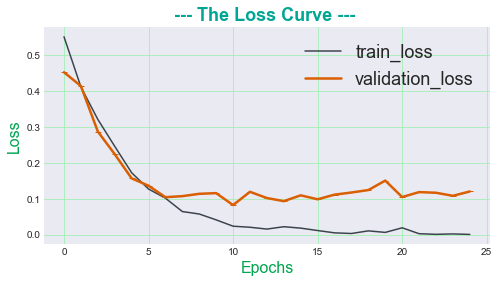

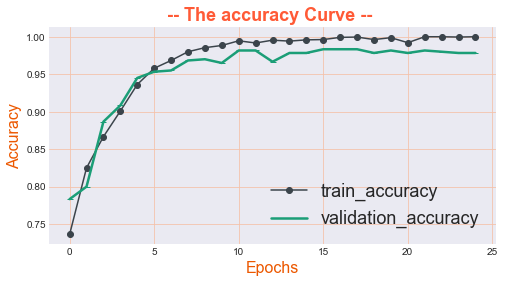

In [40]:
plt.style.use("seaborn-dark")

plt.figure(figsize=[8, 4])
epoch_range = range(0, 25)
loss = adm_hist.history['loss']
val_loss = adm_hist.history['val_loss']
plt.plot(epoch_range, loss, c='#3B444B', linewidth=1.5, marker="")
plt.plot(epoch_range, val_loss, c='#d95f02', linewidth=2.5, marker="_")
plt.legend(['train_loss', 'validation_loss'], fontsize=18, loc="best")
plt.xlabel("Epochs", fontsize=16, color="#00A550")
plt.ylabel("Loss", fontsize=16, color="#00A550")
plt.title("--- The Loss Curve --- ", fontsize=18, color="#00A693", fontweight="bold")
plt.grid(c="#a0eeb1")
plt.figure(figsize=[8, 4])

epoch_range = range(0, 25) 

acc = adm_hist.history['accuracy']
val_acc = adm_hist.history['val_accuracy']

plt.plot(epoch_range, acc, c='#3B444B', linewidth=1.5, marker="o")
plt.plot(epoch_range, val_acc, c='#1b9e77', linewidth=2.5, marker="_")

plt.legend(['train_accuracy', 'validation_accuracy'], fontsize=18, loc="best")

plt.xlabel("Epochs", fontsize=16, c="#EC5800")
plt.ylabel("Accuracy", fontsize=16, c="#EC5800")
plt.title("-- The accuracy Curve -- ", fontsize=18, c="#FF5A36", fontweight="bold")
plt.grid(c="#f5c1a9")

### Confusion Matrix

In [41]:
labels_ = ["No Tumor", "Tumor"]

In [42]:
y_true = tf.argmax(y_test, axis = 1)
predicted_classes = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_true, predicted_classes)

Text(0.5, 1.0, 'Confusion Matrix')

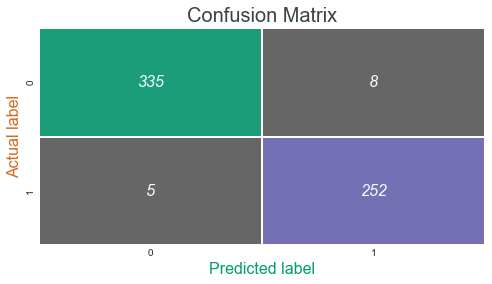

In [43]:
plt.figure(figsize=(8,4))

axsub=plt.subplot(111)

annot_kws= {'fontsize':16, 
           'fontstyle':'italic',
           'color':"azure"}
sns.heatmap(cm,
            linewidths=0.02,
            color="pink",
            annot = True, 
            cbar = False, 
            cmap='Dark2_r', 
            fmt="d",
            ax=axsub,
            annot_kws=annot_kws)




#### We have $13$ wrong predictions from $600$ samples, and all the others are predicted true.
#### The model is approx. $97$ %  accurate 

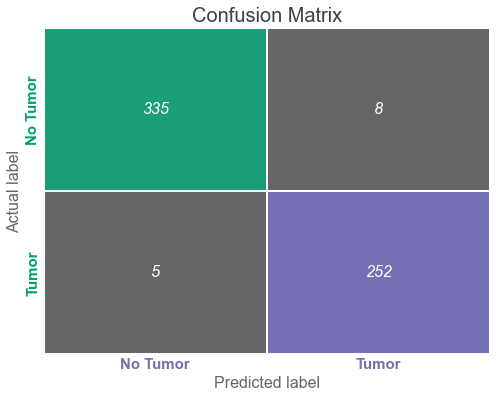

In [79]:

annot_kws={'fontsize':16, 
           'fontstyle':'italic'}

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm,
            linewidths=0.07,
            annot = True, 
            cbar = False, 
            cmap='Dark2_r', 
            fmt="d", 
            ax=ax,
            annot_kws=annot_kws)
ax.xaxis.set_ticklabels(labels_, fontsize=15, c="#7570B3", fontweight="bold")
ax.yaxis.set_ticklabels(labels_, fontsize=15, c="#009F6B", fontweight="bold")

plt.ylabel('Actual label',fontsize=16, c="#666666")
plt.xlabel('Predicted label',fontsize=16, c="#666666")
plt.title('Confusion Matrix',fontsize=20, c="#3B444B")
plt.show()

### Classification Report

In [59]:
import pandas as pd

In [92]:
df = pd.DataFrame(classification_report(y_true, 
                                        predicted_classes, digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='Pastel2',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.985294,0.976676,0.980966,343
1,0.969231,0.980545,0.974855,257
accuracy,0.978333,0.978333,0.978333,0
macro avg,0.977262,0.978611,0.977911,600
weighted avg,0.978414,0.978333,0.978349,600


### Calculate other metrics of performance

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


accuracy = accuracy_score(y_true, predicted_classes)*100
f1 = f1_score(y_true, predicted_classes)*100
precision = precision_score(y_true, predicted_classes)*100
recall = recall_score(y_true, predicted_classes)*100


print(f'Accuracy_score:\t\t{accuracy:.2f} %')
print(f'F1_Score:  \t\t{f1:.2f} %')
print(f'Precision_score: \t{precision:.2f} %')
print(f'Recall_score:  \t\t{recall:.2f} %')


Accuracy_score:		97.83 %
F1_Score:  		97.49 %
Precision_score: 	96.92 %
Recall_score:  		98.05 %


In [93]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_true, predicted_classes)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))



precision: [0.98529412 0.96923077]
recall: [0.97667638 0.98054475]
fscore: [0.98096633 0.97485493]
support: [343 257]



| ***Label***               | ***Precision*** | ***Recall*** | ***FScore*** | 
|---------------------------|-----------------|--------------|--------------|
| 0 **(No Tumor)**          | 98%             | 97%          | 98 %         | 
| 1 **(Tumor)**             | 96%             | 98%          | 97 %         | 
 

### Some notes

1. **The Accuracy** = $97.83$%:

    The accuracy is a ratio of correctly predicted observation to the total observations,
    The model is approx.98% accurate which is the best.

2. **Precision** = $96.92$%:

    Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
    we've got High precision which means we have low false positive rate and we have got approx. 97%, we have just 8 samples with wrong predictio as false positive which means, it was class 1 and it predict as 0, 
    it is dangerous for patients, i wich i had 0 wrong predictions, but it is a pretty good result for a deep learning model.
    
3. **Recall** = $98.05$%:

    Recall is the ratio of correctly predicted positive observations to the all observations in actual class - Tumor.
    Of all the labels that truly contains tumor, how many did we label ? We have got recall of 0.98 which is good for this model as it’s above 0.5. and this is very good prediction.
    
    
4. **F1 score** = $97.49$%:

    This score takes both false positives and false negatives into account. .
    F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
    but in our model there is not much difference between false positive and false negative,
    that's why with only the accuracy we've got best result.
    we have in our case f1 score approx. 97% it is also the best.
